In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

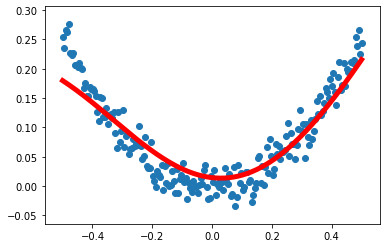

OK


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 使用umpy生产200个随机点
x_data = np.linspace(-0.5, 0.5, 200)[: , np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个 placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random.normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1)+ biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random.normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2) 

# 代价函数 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer()) 
    for i in range(500):
        sess.run(train_step, feed_dict = {x: x_data, y: y_data})
        
    # 获取预测值
    prediction_value = sess.run(prediction, feed_dict = {x:x_data})  
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw = 5)
    plt.show()
    
    
    print('OK')
    
 
